In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
y = data['median_house_value'].values 
y_new=[]
for i in y :
    if i <= 176667 :
        i=1
        y_new.append(i)
    elif i> 176667 and i<= 338334 :
        i=2
        y_new.append(i)
    else :
        i=3 
        y_new.append(i)

In [7]:
y_new = np.array(y_new)
y_new=y_new.reshape(-1,1)
data = pd.DataFrame(data)
data['new_y'] = y_new
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_y
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

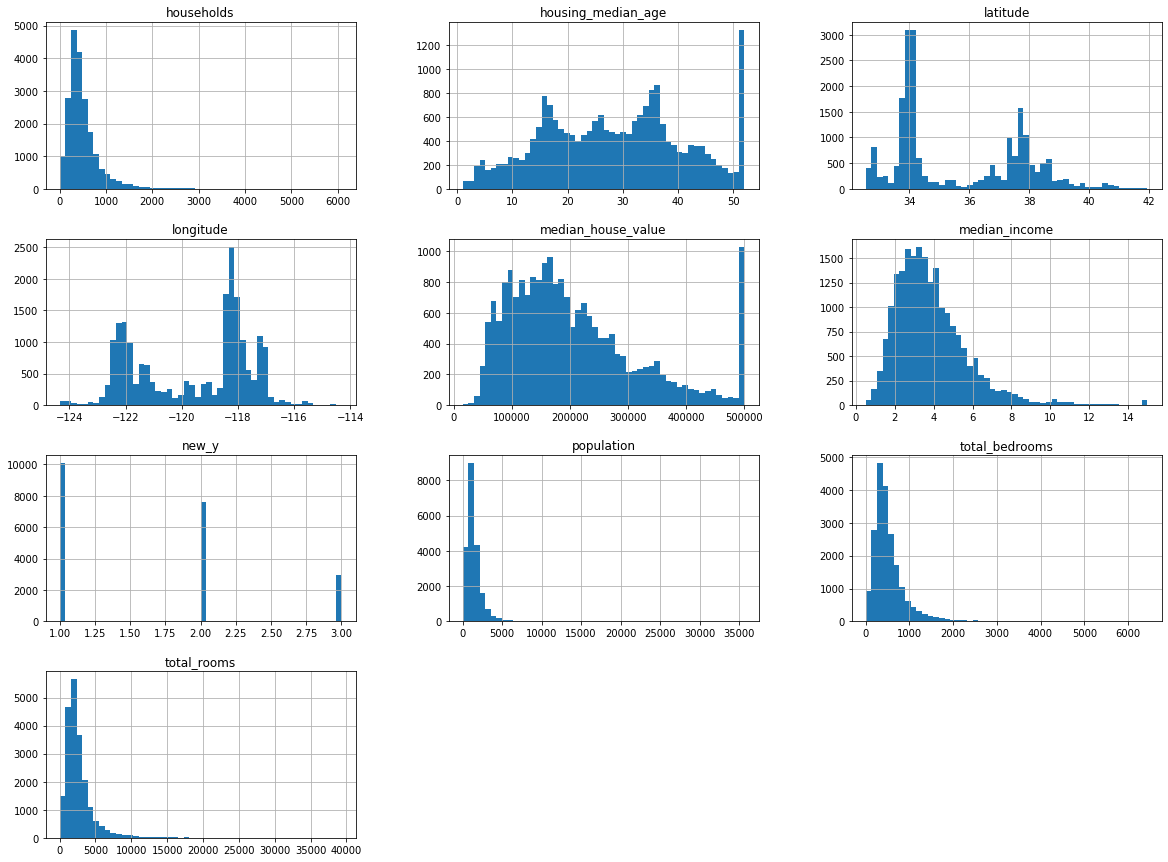

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix=data.corr()
corr_matrix["new_y"].sort_values(ascending=False)

new_y                 1.000000
median_house_value    0.916658
median_income         0.617816
total_rooms           0.123680
housing_median_age    0.102815
households            0.063688
total_bedrooms        0.047130
population           -0.028490
longitude            -0.055132
latitude             -0.123884
Name: new_y, dtype: float64

In [11]:
data = data.fillna(value=data['total_bedrooms'].median())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
new_y                 20640 non-null int32
dtypes: float64(9), int32(1), object(1)
memory usage: 1.7+ MB


In [13]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]

In [14]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    dataa = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(data[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = data[~data[column].isin(dataa[column])]
    return outlierRemoved

In [15]:
df_outliersRemoved = getOutliers(data,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 20640


In [16]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_y,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853


In [17]:
x = data.iloc[:,[2,4,5,7,9,11]].values
y = data.iloc[:,10].values

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
x[:, 4] = labelencoder_X.fit_transform(x[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\tasneem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\tasneem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
x=x[:,1:]
x.shape

(20640, 9)

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=10 ,  random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [37]:
# Predicting the Test set results
y_pred_dt = classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt, normalize=True)


0.7286821705426356

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_all = sc.fit_transform(x)

In [40]:
y_predicted = classifier.predict(X_all)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predicted, normalize=True)


0.7779554263565891

In [42]:
data = pd.DataFrame(data)
data['predictions'] = y_predicted.reshape(-1,1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_y,rooms_per_household,predictions
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,6.984127,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,6.238137,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,8.288136,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,5.817352,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,2


In [43]:
c1 = 0
c2 = 0
c3 = 0 
ta = data['predictions']
for i in ta :
    if i == 1 :
        c1+=1 
    elif i == 2 :
        c2 +=1 
    else :
        c3+=1  
cat_one_percentage = (c1/len(ta))*100 
cat_two_percentage = (c2/len(ta))*100 
cat_three_percentage = (c3/len(ta))*100 

In [44]:
cat_one_percentage

48.11046511627907

In [45]:
cat_two_percentage 


40.10658914728682

In [46]:
cat_three_percentage


11.782945736434108

In [47]:
pd.crosstab(data.new_y , data.predictions)

predictions,1,2,3
new_y,,,
1,8437,1614,38
2,1387,5731,505
3,106,933,1889
